# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
# library imports
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib for better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
# df.head() # show first 5 rows
# df.tail() # last 5 rows
# df.columns # list all column names
# df.shape # get number of rows and columns
# df.info() # additional info about dataframe
# df.describe() # statistical description, only for numeric values
# df['col_name'].value_counts(dropna=False) # count unique values in a column

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code

accidents_df = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep=';')

licenses_df = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep = ';')

In [4]:
# delete 
print(accidents_df.shape) 
#
print(licenses_df.shape) 

(84, 7)
(350, 5)


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code

accidents_df.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [6]:
licenses_df.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

1. Traffic accidents dataframe: 

Dataframe exists in .csv format. The dimensions of the dataframe are (84 rows, 7 columns).
Each row represents traffic accident features as follows: 

    unnamed 0:seems to serve as index for df
    unnamed 0.1: has same values as unnamed 0
    year: describes the year of traffic accident
    region: describes area of traffic accident
    indicator: describes result of traffic accident as injured or dead
    value: corresponds to number of traffic accidents
    geo_point_2d: describes geographical location of traffic accidents  

2. Driving licenses dataframe:

Dataframe exists in .csv format. The dimensions of the dataframe are (350 rows, 5 columns).
Each row represents driving license features as follows:

    nnamed 0:seems to serve as index for df
    year:describes the year of issued driving licenses
    administritive area: describes issuing area
    driving licenses: number of issued licenses
    geo_point_2d:describes geographical location of issuing area 
    


#### 4a. How complete is the data?

Investigate missing values etc.

In [7]:
print(accidents_df.isnull().sum()) # there are 6 missing values in accidents_df['geo_point_2d']
print('-----------------')
print(licenses_df.isnull().sum() ) # there are 25 missing values in accidents_df['geo_point_2d']

#

print('-----------------')
print(accidents_df.shape)
print(licenses_df.shape)


Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64
-----------------
Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64
-----------------
(84, 7)
(350, 5)


In [8]:
# dropping missing values from both dataframes

accidents_df.dropna(how='any', inplace=True)
licenses_df.dropna(how='any', inplace=True)

In [9]:
# missing values re-check

print(accidents_df.isnull().sum()) 
print('-----------------')
print(licenses_df.isnull().sum())


print('-----------------')
print(accidents_df.shape)
print(licenses_df.shape)

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    0
dtype: int64
-----------------
Unnamed: 0             0
Year                   0
Administritive Area    0
Driving Liceses        0
geo_point_2d           0
dtype: int64
-----------------
(78, 7)
(325, 5)


#### 4b. Are there any obvious issues with the observations?

yes, 


- There are unnamed columns and dublicate columns serving as index numbers.

- geo_point column has missing values in both dataframes and were subsequently dropped. 

- geo_point column in both dataframes need to be separated on (',')into two additional cloumns.

- Driving licenses column in the licenses_df contains string of numbers follwed by letter n. n needs to be removed and numbers within the same column need to be converted into integer type.

- Values for Indicator column in accidents_df each contain No.of Casualties - injured/dead. This will have to be trimed to just injured or dead.

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [10]:
# double check this with an AI. is this what the question is asking???

# checking max and min for accidents_df

print(accidents_df.max(axis = 0, skipna = True)); 
print('------------')
print(accidents_df.min(axis = 0, skipna = True));

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                               Tabouk
Indicator       No. of Casualties - Injured
Value                                99925n
geo_point_2d    30.197074783, 41.8171186952
dtype: object
------------
Unnamed: 0                                 0
Unnamed: 0.1                               0
Year                                  (2016)
Region                              Al-Baaha
Indicator                   No. of Accidents
Value                                  1007n
geo_point_2d    17.2072313962, 42.6525807422
dtype: object


In [11]:
# checking max and min for accidents_df

print(licenses_df.max(axis = 0, skipna = True));
print('-----------')
print(licenses_df.min(axis = 0, skipna = True)); 

Unnamed: 0                                     349
Year                                        (2017)
Administritive Area                         Tabouk
Driving Liceses                              9983n
geo_point_2d           30.197074783, 41.8171186952
dtype: object
-----------
Unnamed: 0                                        0
Year                                         (1993)
Administritive Area                         Al-Baha
Driving Liceses                             100291n
geo_point_2d           17.2072313962, 42.6525807422
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#displying datatype for each feature for both dataframes

print(licenses_df.dtypes) 
print('------------------')
print(accidents_df.dtypes)

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object
------------------
Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object


In [13]:
# DataFrame.astype : Cast argument to a specified dtype.
# to_datetime : Convert argument to datetime.
# to_timedelta : Convert argument to timedelta.
# numpy.ndarray.astype : Cast a numpy array to a specified type.
# DataFrame.convert_dtypes : Convert dtypes.

In [14]:
# trying to fix Year from str to int
#method 1: using pd.to_numeric
#accidents_df['Year'] = pd.to_numeric(accidents_df['Year']) #not working. Unable to parse string "(2016)" at position 0

#method 2 df.astype()
# accidents_df.Year.astype(int) # not working base 10 issue

# method 3
#ccidents_df.convert_dtypes  hold up!

What did you learn?
- Do any of them seem odd? 
- Which ones are not as they should be?     

Answer: 


yes,

- features: Unnamed :0 and Unnamed: 0.1 are represented as integers while the rest of features are in object str format.

- the following features will have to be converted:

    Year -> convert to int
    
    Value -> remove 'n' and conver to int
    geopoint -> separate at (,) and conver to float    

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
# using one-line function to convert ['Year'] object str to integer type. and omitting ()

accidents_df['Year'] = accidents_df['Year'].apply(lambda x: x.replace('(', '').replace(')', '')).astype('int')
licenses_df['Year'] = licenses_df['Year'].apply(lambda x: x.replace('(', '').replace(')', '')).astype('int')
#
print(accidents_df.dtypes)
print('--------------')
print(licenses_df.dtypes)



Unnamed: 0       int64
Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object
--------------
Unnamed: 0              int64
Year                    int64
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object


- Make new columns `x` and `y` using `geo_point_2d`

In [16]:
# accidents_df['x'] = accidents_df.geo_point_2d.str[0:,] 
# accidents_df['y'] = accidents_df.geo_point_2d.str[:]

In [17]:
# creating new x,y columns using geo_point_2d by splitting on (',') 

accidents_df[['x','y']] = accidents_df.geo_point_2d.str.split(",",expand=True,)
licenses_df[['x','y']] = licenses_df.geo_point_2d.str.split(",",expand=True,)

In [18]:
type(accidents_df.x.loc[10]) #checking type of random value in x column

str

In [19]:
# converting x and y cols to floats instead of object str for both dataframes

accidents_df[['x','y']] = accidents_df[['x','y']].astype('float')
licenses_df[['x','y']] = licenses_df[['x','y']].astype('float')

In [20]:
type(accidents_df.x.loc[10]) # re-checking type of the same value in x column

numpy.float64

- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
# using .apply lambda to omit letter n from columns ['Value'] and ['Driving Licenses'] 
# then converting column value types into integers

accidents_df['Value'] = accidents_df['Value'].apply(lambda x: x.replace('n', '')).astype('int')
licenses_df['Driving Liceses'] = licenses_df['Driving Liceses'].apply(lambda x: x.replace('n', '')).astype('int')

In [22]:
# Keep this for ref


# licenses_df['Driving Liceses'] =licenses_df['Driving Liceses'].map(lambda x: x.lstrip('n').rstrip('n'))
# licenses_df.head(50)    

In [23]:
# I will try to replace n and convert str to int in one go like before. let hack!

#keep 2 lines below for ref
# accidents_df['Value'] = accidents_df['Value'].apply(lambda x: x.replace('n', '').replace('n', '')).astype('int')
# licenses_df['Driving Liceses'] = licenses_df['Driving Liceses'].apply(lambda x: x.replace('n', '').replace('n', '')).astype('int')


##below code was used above. delete this when confident
# # using .apply lambda to omit letter n from columns and convert column values from object str into integers
# accidents_df['Value'] = accidents_df['Value'].apply(lambda x: x.replace('n', '')).astype('int')
# licenses_df['Driving Liceses'] = licenses_df['Driving Liceses'].apply(lambda x: x.replace('n', '')).astype('int')


In [24]:
#keep the line below for ref
#licenses_df['Driving Liceses'] =licenses_df['Driving Liceses'].map(lambda x: x.lstrip('n').rstrip('n'))

###

#removing 'n' from licenses_df['DrivingLicenses']
#removing 'n' from accidents_df['Value']
# licenses_df['Driving Liceses'] =licenses_df['Driving Liceses'].map(lambda x: x.rstrip('n'))#####DONE using .replace above
# accidents_df['Value'] =accidents_df['Value'].map(lambda x: x.rstrip('n')) #####DONE using .replace above


In [25]:
### next, change [value] and [Drvinglicenses] cols into int ##########DONE

In [26]:
# #removing '()' from licenses_df['Year']
# licenses_df['Year'] =licenses_df['Year'].map(lambda x: x.lstrip('()').rstrip('()')) #####DONE using .replace above
# licenses_df.head() #####DONE using .replace above


#removing 'n' from accidents_df['Value']
# accidents_df['Value'] =accidents_df['Value'].map(lambda x: x.lstrip('n').rstrip('n')) #####DONE using .replace above
# accidents_df.head() #####DONE using .replace above

In [27]:
# most likely delete this

#removing 'No.of Casualities' from licenses_df['Indicator']

# accidents_df['Indicator'] =accidents_df['Indicator'].map(lambda x: x.lstrip('No.ofCasualties -').rstrip())
# accidents_df.head()

- Finish your data modifications by making sure the columns are now typed appropriately.

In [28]:
accidents_df.head(1)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.26369


In [29]:
licenses_df.head(1)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369


In [30]:
# dropping unnecessary columns goint forward
accidents_df = accidents_df.drop(['Unnamed: 0','Unnamed: 0.1','geo_point_2d'], axis=1)
licenses_df = licenses_df.drop(['Unnamed: 0','geo_point_2d'], axis=1)


In [31]:
accidents_df.head()

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [32]:
licenses_df.head()

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [33]:
# re-check of null values

print(licenses_df.isnull().sum())
print('-----------------')
print(accidents_df.isnull().sum())

Year                   0
Administritive Area    0
Driving Liceses        0
x                      0
y                      0
dtype: int64
-----------------
Year         0
Region       0
Indicator    0
Value        0
x            0
y            0
dtype: int64


In [34]:
#checking dublicates

print(licenses_df.duplicated().sum()) 
print(accidents_df.duplicated().sum())

0
0


- Display the data types again to confirm they are correct.

In [35]:
#Code:
print(accidents_df.dtypes)
print('---------------')
print(licenses_df.dtypes)

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object
---------------
Year                     int64
Administritive Area     object
Driving Liceses          int64
x                      float64
y                      float64
dtype: object


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [36]:
# displaying origina column names in licenses_df
licenses_df.columns

Index(['Year', 'Administritive Area', 'Driving Liceses', 'x', 'y'], dtype='object')

In [37]:
# renaming columns in licenses_df using the dictionary method:

licenses_df.rename(columns={
        'Year':'year',                  # l_year == license year
        'Administritive Area':'region', # l_region == license region
        'Driving Liceses':'l_count',      # l_count == licneses count
        'x':'l_geoloc_x',                 # l_geoloc_x == license geo location x
        'y':'l_geoloc_y'                  # l_geoloc_y == license geo location y
            }, inplace=True)

In [38]:
# displaying new column names in licenses_df
licenses_df.head()

,year,region,l_count,l_geoloc_x,l_geoloc_y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [39]:
# displaying a list of original column names in accidnets_df
accidents_df.columns

Index(['Year', 'Region', 'Indicator', 'Value', 'x', 'y'], dtype='object')

In [40]:
# renaming columns in accidents_df using the dictionary method:

accidents_df.rename(columns={
        'Year':'year',            # a_year == accidents year
        'Region':'region',        # a_region == accidents region
        'Indicator':'a_casualties',    # Indicator == accident outcome
        'Value':'a_count',          # a_count == accidents count
        'x':'a_geoloc_x',           # a_geoloc_x == accidents geo location x
        'y':'a_geoloc_y'            # a_geoloc_y == accidents geo location y
            }, inplace=True)

In [41]:
# displaying new column names in accidents_df
accidents_df.head()

,year,region,a_casualties,a_count,a_geoloc_x,a_geoloc_y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [52]:
#the code in this cell left aligns the table below.
%%html
<style>
table {float:left}
</style>

SyntaxError: invalid syntax (<ipython-input-52-c74b4d7ac964>, line 3)

|Feature|Type|Dataset|Description|
|:-|:-|:-|:------------:|
|a_year|*int*|accidents_df|year in which traffict accidents occurred|
|a_region|*object*|accidents_df|region where traffict accidents occurred|
|a_casualties|*object*|accidents_df|outcome of accidents - dead/injured|
|a_count|*int*|accidents_df|number of resulting casualties from accidents|
|a_geoloc_x|*float*|accidents_df|x coordinate location of accidents| 
|a_geoloc_y|*float*|accidents_df|y coordinate location of accidents|
|---|---|---|---|
|l_year|*int*|licenses_df|year of issued driving licenses|
|l_region|*object*|licenses_df|region of issuded driving licenses|
|l_count|*int*|licenses_df|number of issued driving licenses|
|l_geoloc_x|*float*|licenses_df|x coordinate location of driving licenses issuing region|
|l_geoloc_y|*float*|licenses_df|y coordinate location of driving licenses issuing region|





#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

#Answer 

 - unnecessary rows correspond to value == Total instead of a particular region/area 
 - the same rows (with Total instead of region) also lack geo_point_2d values (nulls)
        
        These rows were droped earlier using:
        
        accidents_df.dropna(how='any', inplace=True)
        licenses_df.dropna(how='any', inplace=True)


In [43]:
print(accidents_df['a_region'].value_counts()) #getting value counts for each region in region column
print('---------------')
print(accidents_df['a_region'].value_counts().sum()) #adding regions 
print('---------------')
print(accidents_df.shape) # confirming number of regions add up to total

KeyError: 'a_region'

In [42]:
print(licenses_df['l_region'].value_counts()) #getting value counts for each region in region column
print('---------------')
print(licenses_df['l_region'].value_counts().sum()) #adding regions 
print('---------------')
print(licenses_df.shape) # confirming number of regions add up to total

KeyError: 'l_region'

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [45]:
#both are in long format since each row contains one measure for the given variable or subject.

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [46]:
# wide format would work best. this way, each row will contain all mesures for a particular subject

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [67]:
#col_concat_df = pd.concat([licenses_df, accidents_df], axis=1)

In [68]:
#col_concat_df.head()

,l_year,l_region,l_count,l_geoloc_x,l_geoloc_y,a_year,a_region,a_casualties,a_count,a_geoloc_x,a_geoloc_y
0,2012.0,Makkah,143954.0,21.628963,41.26369,2016.0,Makkah,No. of Casualties - Injured,12383.0,21.628963,41.263690
1,1994.0,Makkah,75349.0,21.628963,41.26369,2016.0,Eastern Region,No. of Casualties - Dead,1113.0,23.288331,50.147830
2,1998.0,Makkah,86082.0,21.628963,41.26369,2016.0,Tabouk,No. of Casualties - Dead,434.0,27.901655,37.259858
3,2004.0,Makkah,86636.0,21.628963,41.26369,2016.0,Hail,No. of Casualties - Dead,299.0,27.400846,41.440696
4,2005.0,Makkah,65099.0,21.628963,41.26369,2016.0,Hail,No. of Accidents,10199.0,27.400846,41.440696


In [69]:
#col_concat_df.shape

(331, 11)

In [53]:
# this doesnt work cos col names are different i think

inner_join = pd.merge(licenses_df,accidents_df,on=['year','region'], how='inner')
inner_join.head(50) 

,year,region,l_count,l_geoloc_x,l_geoloc_y,a_casualties,a_count,a_geoloc_x,a_geoloc_y
0,2017,Hail,22035,27.400846,41.440696,No. of Casualties - Dead,265,27.400846,41.440696
1,2017,Hail,22035,27.400846,41.440696,No. of Accidents,9379,27.400846,41.440696
2,2017,Hail,22035,27.400846,41.440696,No. of Casualties - Injured,773,27.400846,41.440696
3,2017,Northern Boarder,5280,30.197075,41.817119,No. of Accidents,11540,30.197075,41.817119
4,2017,Northern Boarder,5280,30.197075,41.817119,No. of Casualties - Dead,112,30.197075,41.817119
5,2017,Northern Boarder,5280,30.197075,41.817119,No. of Casualties - Injured,374,30.197075,41.817119
6,2017,Tabouk,10232,27.901655,37.259858,No. of Accidents,11713,27.901655,37.259858
7,2017,Tabouk,10232,27.901655,37.259858,No. of Casualties - Injured,1243,27.901655,37.259858
8,2017,Tabouk,10232,27.901655,37.259858,No. of Casualties - Dead,348,27.901655,37.259858
9,2016,Northern Boarder,4958,30.197075,41.817119,No. of Casualties - Dead,193,30.197075,41.817119


In [53]:
inner_join.shape

(54, 9)

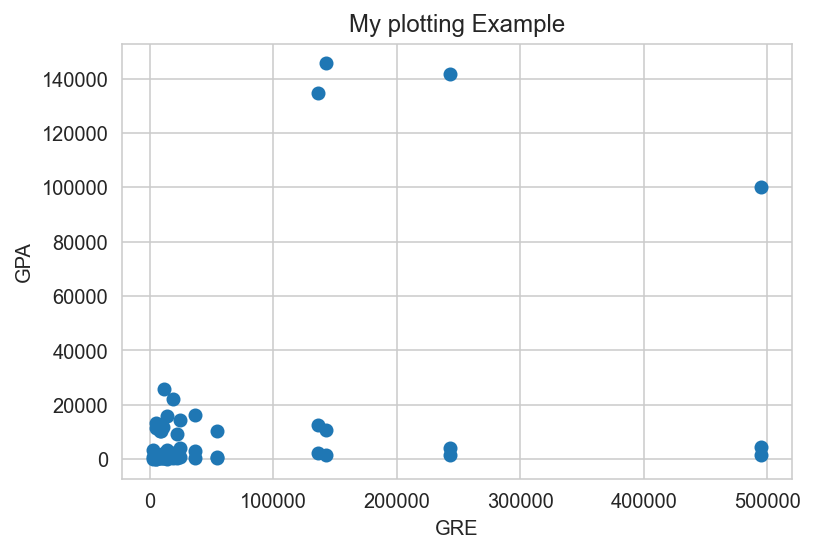

In [44]:
plt.scatter(inner_join.l_count, inner_join.a_count)
plt.xlabel('GRE')
plt.ylabel('GPA');
plt.title('My plotting Example');

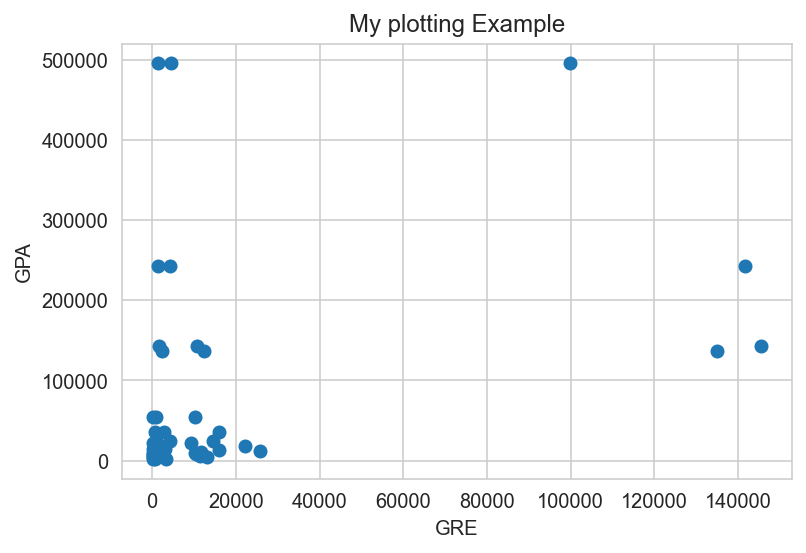

In [50]:
plt.scatter(inner_join.a_count, inner_join.l_count)
plt.xlabel('GRE')
plt.ylabel('GPA');
plt.title('My plotting Example');

In [52]:
pd.merge(licenses_df,accidents_df,left_on='l_year',right_on='a_region')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [ ]:
#code

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [ ]:
#Code:

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [ ]:
#code

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [ ]:
#Code:

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [ ]:
#code

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [ ]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: